In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# exploring basic info about the data

df = pd.read_csv("D:/python_github/netflix_titles.csv")
print(df.head())
df.info()
df.describe()
df.isnull().sum()

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
# data cleaning

# Dropping duplicates
df.drop_duplicates(inplace=True)

# Filling missing values in some of the columns
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Split year, month from date_added for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [4]:
df['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

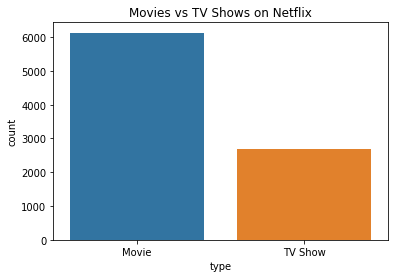

In [5]:
# Plotting movie vs TV show counts

sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

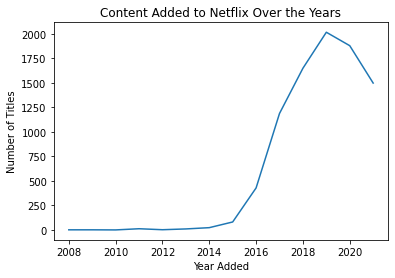

In [6]:
# content over the years (lineplot)

content_by_year = df['year_added'].value_counts().sort_index()
sns.lineplot(x=content_by_year.index, y=content_by_year.values)
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

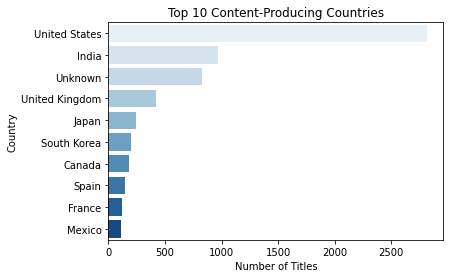

In [7]:
# top 10 countries producing content

country_counts = df['country'].value_counts().head(10)
sns.barplot(y=country_counts.index, x=country_counts.values, palette='Blues')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

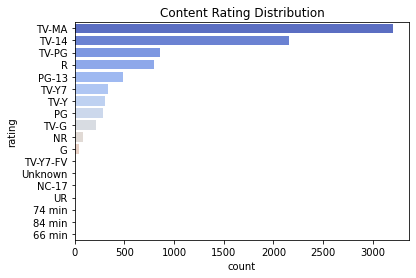

In [8]:
# rating distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Content Rating Distribution")
plt.show()

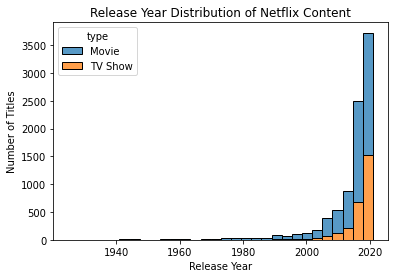

In [9]:
# histogram with release year and content type
sns.histplot(data=df, x='release_year', hue='type', bins=30, kde=False, multiple='stack')
plt.title("Release Year Distribution of Netflix Content")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

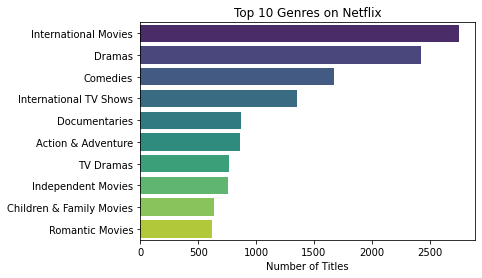

In [10]:
# top 10 content genres
# 'listed_in' field contains multiple genres separated by commas, so making a list of it and then combining in a single list
all_genres = df['listed_in'].str.split(', ')
genres_flat = []
for sublist in all_genres.dropna():
    for g in sublist:
        genres_flat.append(g)
genre_counts = pd.Series(genres_flat).value_counts().head(10)

sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()

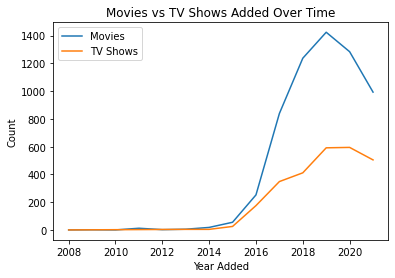

In [11]:
# movies and shows by year
movie_by_year = df[df['type']=='Movie'].groupby('year_added').size()
shows_by_year = df[df['type']=='TV Show'].groupby('year_added').size()

sns.lineplot(x=movie_by_year.index, y=movie_by_year.values, label='Movies')
sns.lineplot(x=shows_by_year.index, y=shows_by_year.values, label='TV Shows')
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.legend()
plt.show()

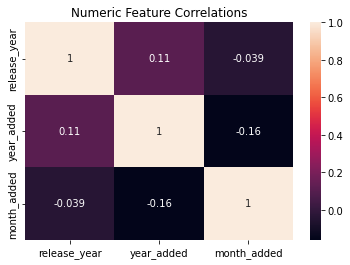

In [12]:
# correlation between numeric features

corr_table = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_table, annot=True)
plt.title("Numeric Feature Correlations")
plt.show()

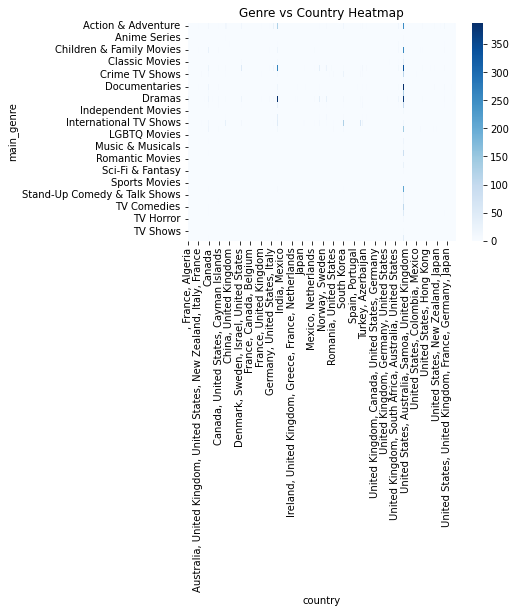

In [13]:
# heatmap of genre vs country
df['main_genre'] = df['listed_in'].str.split(',').str[0]
genre_country = pd.crosstab(df['main_genre'],df['country'])
sns.heatmap(genre_country, cmap="Blues", cbar=True)
plt.title("Genre vs Country Heatmap")
plt.show()

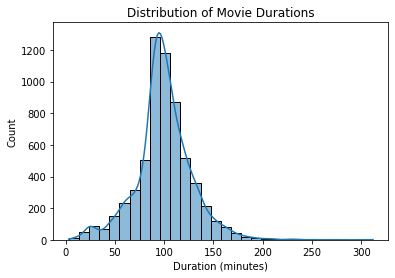

In [14]:
#movie duration distribution
movies = df[df['type'] == 'Movie'].copy()
movies['minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

sns.histplot(movies['minutes'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()